# 수집

In [5]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time

In [22]:
group = html.find("td", class_="each").text.strip()

nums = html.find_all("span", class_="num")
num = ''.join([n.text for n in nums])

In [32]:
def make_numbers(html):
    nums = html.find_all("span", class_="num")
    del nums[-3:-1]
    num = ''.join([n.text for n in nums])

    return num


def make_groups(html):
    group = html.find("td", class_="each").text.strip()

    return group

In [33]:
def make_numbers(html):
    group = html.find("td", class_="each").text.strip()

    nums = html.find_all("span", class_="num")
    num = ''.join([n.text for n in nums])

    return group, num

In [34]:
import random

total = []
for n in range(1, 21):
    url = requests.get(f"https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q={n}%ED%9A%8C+%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C")
    html = BeautifulSoup(url.text)

    group, num = make_numbers(html)

    total.append([group, num])

    time.sleep(random.random() + 1)

print(total)

[['4조', '162132162132162132162132162132-62132--2132---132----32-----2278239'], ['2조', '450558450558450558450558450558-50558--0558---558----58-----8154457'], ['4조', '544955544955544955544955544955-44955--4955---955----55-----5059369'], ['4조', '124420124420124420124420124420-24420--4420---420----20-----0221097'], ['4조', '754655754655754655754655754655-54655--4655---655----55-----5190779'], ['5조', '193202193202193202193202193202-93202--3202---202----02-----2206460'], ['2조', '597093597093597093597093597093-97093--7093---093----93-----3482595'], ['4조', '234058234058234058234058234058-34058--4058---058----58-----8548682'], ['3조', '133510133510133510133510133510-33510--3510---510----10-----0213240'], ['2조', '770173770173770173770173770173-70173--0173---173----73-----3064263'], ['1조', '867654867654867654867654867654-67654--7654---654----54-----4485530'], ['5조', '076676076676076676076676076676-76676--6676---676----76-----6611004'], ['1조', '669245669245669245669245669245-69245--9245---245----45-

# 저장

In [27]:
lotto_df = pd.DataFrame(total, columns=['조', '번호'])
lotto_df.to_excel("lotto.xlsx", index=False)

# 분석

4조: 7회 출현
2조: 3회 출현
5조: 3회 출현
3조: 3회 출현
1조: 4회 출현


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


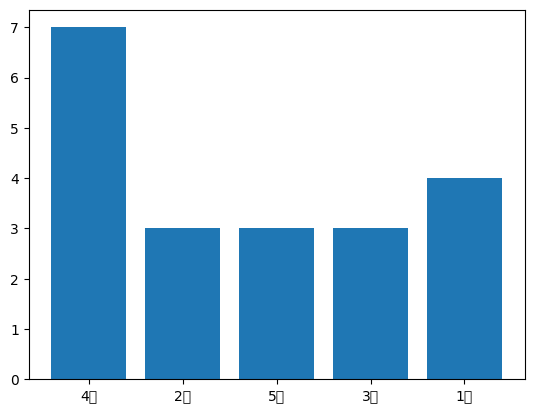

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

lotto_df = pd.read_excel('lotto.xlsx')

group_counts = Counter(lotto_df['조'])

for group, count in group_counts.items():
    print(f'{group}: {count}회 출현')

groups = list(group_counts.keys())
counts = list(group_counts.values())

plt.bar(groups, counts)
plt.show()

현재 3번 : 10회 안나오고있습니다
7번 : 16회로 역대 최대입니다


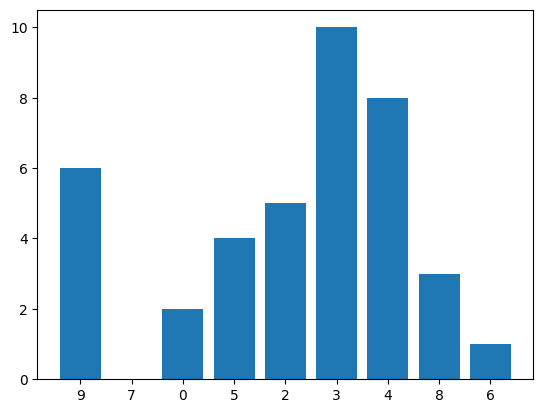

In [31]:
lotto_df['끝번호'] = lotto_df['번호'].astype(str).str[-1]

last_appearance = {}
absence_streaks = {}

for idx, row in lotto_df.iterrows():
    끝번호 = row['끝번호']

    if 끝번호 in last_appearance:
        absence_streak = idx + 1 - last_appearance[끝번호]
        if 끝번호 in absence_streaks:
            absence_streaks[끝번호] = max(absence_streaks[끝번호], absence_streak)
        else:
            absence_streaks[끝번호] = absence_streak
    else:
        absence_streaks[끝번호] = 0

    last_appearance[끝번호] = idx + 1

current_round = lotto_df.shape[0]
current_absence = {k: current_round - v for k, v in last_appearance.items()}
longest_current_absence = max(current_absence.items(), key=lambda x: x[1])

longest_streak = max(absence_streaks.items(), key=lambda x: x[1])

print(f'현재 {longest_current_absence[0]}번 : {longest_current_absence[1]}회 안나오고있습니다')
print(f'{longest_streak[0]}번 : {longest_streak[1]}회로 역대 최대입니다')

keys = list(current_absence.keys())
values = [current_absence[k] for k in keys]

plt.bar(keys, values)
plt.show()